In [2306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Manual data cleaning approach**

In [2307]:
raw_ufc_data = pd.read_csv('fight_data.csv')

# Removing irrelavant columns (More details in report)
irrelevant_columns = ['R_odds', 'B_odds', 'R_ev', 'B_ev', 'B_current_lose_streak', 'B_current_win_streak',
                      'B_longest_win_streak', 'R_current_lose_streak', 'R_current_win_streak', 'R_longest_win_streak',
                      'empty_arena', 'constant_1', 'B_match_weightclass_rank', 'R_match_weightclass_rank',
                      "R_Women's Flyweight_rank", "R_Women's Featherweight_rank", "R_Women's Strawweight_rank",
                      "R_Women's Bantamweight_rank", "R_Heavyweight_rank", "R_Light Heavyweight_rank",
                      'R_Middleweight_rank', 'R_Welterweight_rank', 'R_Lightweight_rank', 'R_Featherweight_rank',
                      'R_Bantamweight_rank', 'R_Flyweight_rank', 'R_Pound-for-Pound_rank',
                      "B_Women's Flyweight_rank", "B_Women's Featherweight_rank", "B_Women's Strawweight_rank",
                      "B_Women's Bantamweight_rank", 'B_Heavyweight_rank', 'B_Light Heavyweight_rank',
                      'B_Middleweight_rank', 'B_Welterweight_rank', 'B_Lightweight_rank', 'B_Featherweight_rank',
                      'B_Bantamweight_rank', 'B_Flyweight_rank', 'B_Pound-for-Pound_rank', 'r_dec_odds', 'b_dec_odds',
                      'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds']

raw_ufc_data.drop(columns=irrelevant_columns, inplace=True)

In [2308]:
# Find the missing rows
missing_rows = {}
for column in raw_ufc_data.columns:
    missing_count = raw_ufc_data[column].isnull().sum()
    missing_rows[column] = missing_count

print("Missing rows for each column:")
for column, missing_count in missing_rows.items():
    print(f"{column}: {missing_count} missing rows")

Missing rows for each column:
R_fighter: 0 missing rows
B_fighter: 0 missing rows
date: 0 missing rows
location: 0 missing rows
country: 0 missing rows
Winner: 0 missing rows
title_bout: 0 missing rows
weight_class: 0 missing rows
gender: 0 missing rows
no_of_rounds: 0 missing rows
B_draw: 0 missing rows
B_avg_SIG_STR_landed: 930 missing rows
B_avg_SIG_STR_pct: 765 missing rows
B_avg_SUB_ATT: 832 missing rows
B_avg_TD_landed: 833 missing rows
B_avg_TD_pct: 842 missing rows
B_losses: 0 missing rows
B_total_rounds_fought: 0 missing rows
B_total_title_bouts: 0 missing rows
B_win_by_Decision_Majority: 0 missing rows
B_win_by_Decision_Split: 0 missing rows
B_win_by_Decision_Unanimous: 0 missing rows
B_win_by_KO/TKO: 0 missing rows
B_win_by_Submission: 0 missing rows
B_win_by_TKO_Doctor_Stoppage: 0 missing rows
B_wins: 0 missing rows
B_Stance: 2 missing rows
B_Height_cms: 0 missing rows
B_Reach_cms: 0 missing rows
B_Weight_lbs: 0 missing rows
R_draw: 0 missing rows
R_avg_SIG_STR_landed: 455 

In [2309]:
# Fill missing values with mean
columns_to_fill = ['B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct',
                   'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct']
for column in columns_to_fill:
    raw_ufc_data[column] = raw_ufc_data[column].fillna(raw_ufc_data[column].mean())

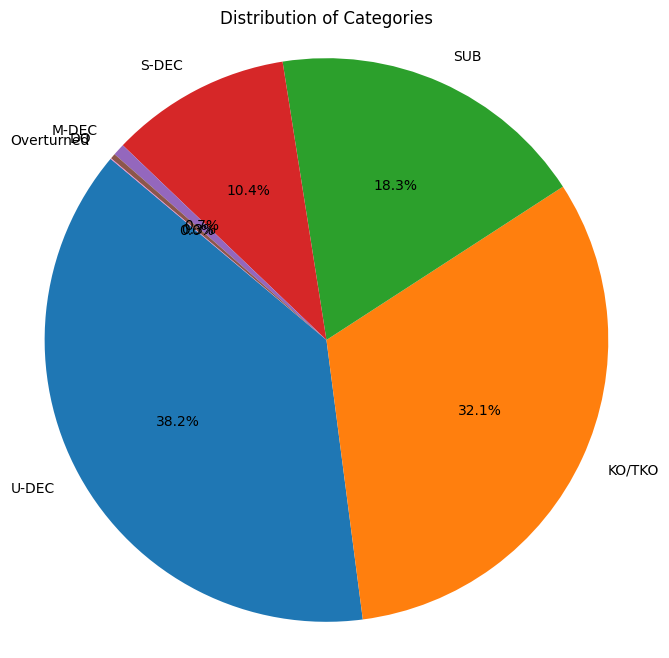

In [2310]:
category_counts = raw_ufc_data['finish'].value_counts()


# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [2311]:
# Fill missing values for 'finish' column based on specified distribution
finish_distribution = {'DQ': 0.3, 'KO/TKO': 32, 'M-Dec': 0.6, 'Overturned': 0.04, 'S-dec': 10.4, 'Sub': 18.3, 'U-Dec': 38.17}
for finish_type, percentage in finish_distribution.items():
    num_missing = int(missing_rows['finish'] * percentage / 100)
    raw_ufc_data.loc[raw_ufc_data['finish'].isnull(), 'finish'] = finish_type
    missing_rows['finish'] -= num_missing

In [2312]:
# Replace missing values for 'finish_details' with 'blank'
raw_ufc_data['finish_deatils']=raw_ufc_data['finish_details'].fillna('blank')

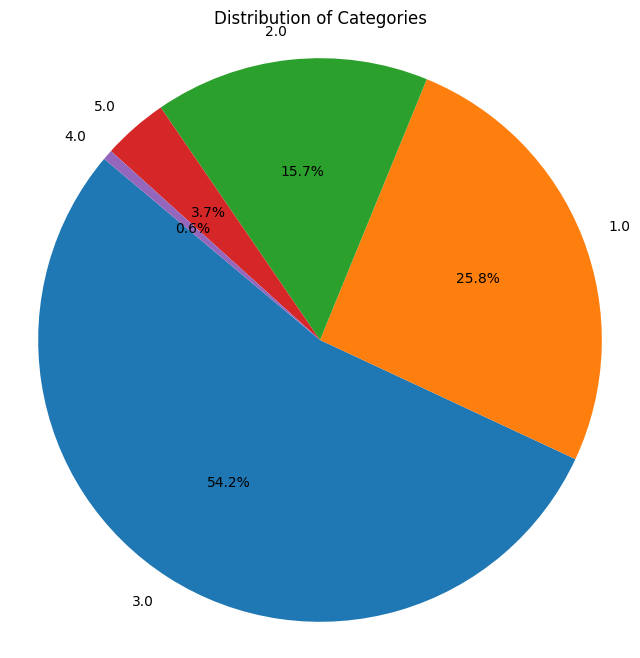

In [2313]:
category_counts = raw_ufc_data['finish_round'].value_counts()


# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [2314]:
# Distribute missing values for 'finish_round' based on specified percentages
round_distribution = {1: 25.8, 2: 15.7, 3: 54.1, 4: 0.6, 5: 3.7}
for round_num, percentage in round_distribution.items():
    num_missing = int(missing_rows['finish_round'] * percentage / 100)
    raw_ufc_data.loc[raw_ufc_data['finish_round'].isnull(), 'finish_round'] = round_num
    missing_rows['finish_round'] -= num_missing

In [2315]:
# Replace missing values for 'finish_round_time' with '5:00'
raw_ufc_data['finish_round_time']=raw_ufc_data['finish_round_time'].fillna('5:00')
# Calculate and replace missing values for 'total_fight_time_secs' based on (finish round * 5 * 60)
raw_ufc_data['total_fight_time_secs']=raw_ufc_data['total_fight_time_secs'].fillna(raw_ufc_data['finish_round'] * 5 * 60).astype(int)



In [2316]:
# Additional cleaning for B_Stance
raw_ufc_data.loc[raw_ufc_data['B_fighter'] == 'Juancamilo Ronderos', 'B_Stance'] = 'Southpaw'
raw_ufc_data.loc[raw_ufc_data['B_fighter'] == 'Juan Espino', 'B_Stance'] = 'Orthodox'

# Function to round numbers to two decimal places
def round_to_two_decimals(value):
    return round(value, 2)

In [2317]:
# Convert all numerical columns to two decimal places
numerical_columns = raw_ufc_data.select_dtypes(include='number').columns
raw_ufc_data[numerical_columns] = raw_ufc_data[numerical_columns].map(round_to_two_decimals)
# Fix spacing issue in the 'Country' column
raw_ufc_data['country'] = raw_ufc_data['country'].str.strip()

In [2318]:
# Write the updated data to a new file
data=raw_ufc_data

In [2319]:
# Finding numerical and categorical data
numrical_columns=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index.tolist()
categorical_columns=data.dtypes[(data.dtypes=='object')|(data.dtypes=='bool')].index.tolist()

# Using standard scaler for numerical values
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [2320]:
# Use label encoding for categorical values
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    data[col] = LE.fit_transform(data[col])

In [2321]:
# Separating features and label
y=data['Winner']
X=data.drop(['Winner'], axis=1)

# Creating training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.25)

In [2322]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

all_accuracies = []

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators = 400, max_depth = 12, random_state = 2),
    'K Nearest Neighbour': KNeighborsClassifier(n_neighbors=100),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 128, 64), max_iter=300),
    'Support Vector Machine': SVC(),
}

print("Using manual data cleaning method")
# Train and evaluate each model
accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)
    print(name, accuracy)
    accuracies.append((name, accuracy))
all_accuracies.append(accuracies)

    



Using manual data cleaning method
Decision Tree 0.5285947712418301
Random Forest 0.6160130718954249
K Nearest Neighbour 0.5800653594771242
Neural Network 0.5882352941176471
Support Vector Machine 0.5874183006535948


In [2323]:
all_accuracies

[[('Decision Tree', 0.5285947712418301),
  ('Random Forest', 0.6160130718954249),
  ('K Nearest Neighbour', 0.5800653594771242),
  ('Neural Network', 0.5882352941176471),
  ('Support Vector Machine', 0.5874183006535948)]]

..

..

..

**Using column correlation approach**

In [2324]:
data = pd.read_csv('fight_data.csv')
data['Winner']=data['Winner'].map({'Red': 1, 'Blue': 0})

# Drop last 3 error causing columns for calculating correlation coeffcient
data.drop(["R_Women's Featherweight_rank","B_Women's Featherweight_rank","constant_1"],axis=1, inplace=True)

In [2325]:
# Drop columns with more than 40 percent null values
threshold = len(data) * 0.4
columns_to_drop = data.columns[data.isnull().sum() > threshold]
data.drop(columns=columns_to_drop, inplace=True)

In [2326]:
# Finding numerical and categorical data
numerical_columns=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index.tolist()
categorical_columns=data.dtypes[(data.dtypes=='object')|(data.dtypes=='bool')].index.tolist()

In [2327]:
# Calculate correlation coefficients between numerical columns and label
corr_dict = abs(data[numerical_columns].corrwith(data['Winner']))
corr_dict= corr_dict.sort_values(ascending=False)

for col, corr in corr_dict.items():
    print(f"{col}: {corr}")

Winner: 1.0
B_odds: 0.3354171609573779
R_odds: 0.32871586928229074
R_ev: 0.31088232076220246
B_ev: 0.3081878492397121
b_dec_odds: 0.221583083724362
b_ko_odds: 0.205756743440299
r_ko_odds: 0.18258057671816436
r_dec_odds: 0.1639263926376019
b_sub_odds: 0.15326525026325813
r_sub_odds: 0.12816833945922929
age_dif: 0.11731524976246602
R_age: 0.10793153249962678
win_streak_dif: 0.1033604427727739
B_age: 0.10218685783046702
avg_td_dif: 0.09292810085005482
R_losses: 0.08730282072579937
R_avg_TD_landed: 0.07895555230571519
R_win_by_Decision_Split: 0.07263135483281428
reach_dif: 0.07053684358868599
R_avg_SIG_STR_pct: 0.06747445312747767
R_current_win_streak: 0.06588206861392024
R_avg_TD_pct: 0.06405954681394006
R_current_lose_streak: 0.060628655891934655
loss_dif: 0.05917695921382297
B_avg_TD_landed: 0.05473316677481372
sig_str_dif: 0.05431447382959443
B_current_win_streak: 0.05112968429486645
total_round_dif: 0.04532667478293639
B_Reach_cms: 0.04220006507263429
B_total_title_bouts: 0.0400695392

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


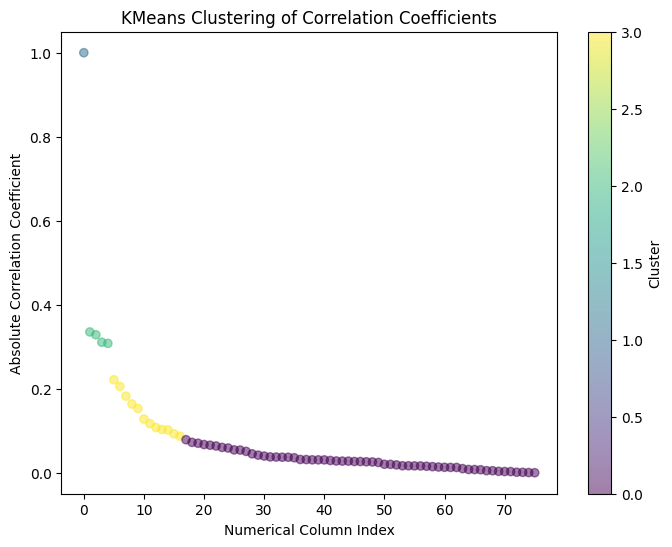

In [2328]:
# Visualising correlation coefficients with KMeans
from sklearn.cluster import KMeans
X = corr_dict.values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(range(len(corr_dict)), corr_dict.values, c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Numerical Column Index')
plt.ylabel('Absolute Correlation Coefficient')
plt.title('KMeans Clustering of Correlation Coefficients')
plt.colorbar(label='Cluster')
plt.show()



In [2329]:
# Selecting columns with correlation greater than>10 percent
selected_columns = {col: correlation for col, correlation in corr_dict.items() if correlation > 0.05}

# Print the selected columns and their correlation values
for col, correlation in selected_columns.items():
    print(f"{col}: {correlation}")

Winner: 1.0
B_odds: 0.3354171609573779
R_odds: 0.32871586928229074
R_ev: 0.31088232076220246
B_ev: 0.3081878492397121
b_dec_odds: 0.221583083724362
b_ko_odds: 0.205756743440299
r_ko_odds: 0.18258057671816436
r_dec_odds: 0.1639263926376019
b_sub_odds: 0.15326525026325813
r_sub_odds: 0.12816833945922929
age_dif: 0.11731524976246602
R_age: 0.10793153249962678
win_streak_dif: 0.1033604427727739
B_age: 0.10218685783046702
avg_td_dif: 0.09292810085005482
R_losses: 0.08730282072579937
R_avg_TD_landed: 0.07895555230571519
R_win_by_Decision_Split: 0.07263135483281428
reach_dif: 0.07053684358868599
R_avg_SIG_STR_pct: 0.06747445312747767
R_current_win_streak: 0.06588206861392024
R_avg_TD_pct: 0.06405954681394006
R_current_lose_streak: 0.060628655891934655
loss_dif: 0.05917695921382297
B_avg_TD_landed: 0.05473316677481372
sig_str_dif: 0.05431447382959443
B_current_win_streak: 0.05112968429486645


In [2330]:
# Creating the new dataset with the selected columns
column_list=list(selected_columns.keys())
for c in categorical_columns:
    if (c not in column_list):
        column_list.append(c)
new_data=data.loc[:,list(column_list)]
data=new_data

In [2331]:
data.isnull().sum()

Winner                        0
B_odds                        0
R_odds                        1
R_ev                          1
B_ev                          0
b_dec_odds                  819
b_ko_odds                  1062
r_ko_odds                  1049
r_dec_odds                  803
b_sub_odds                 1061
r_sub_odds                 1049
age_dif                       0
R_age                         0
win_streak_dif                0
B_age                         0
avg_td_dif                    0
R_losses                      0
R_avg_TD_landed             357
R_win_by_Decision_Split       0
reach_dif                     0
R_avg_SIG_STR_pct           357
R_current_win_streak          0
R_avg_TD_pct                367
R_current_lose_streak         0
loss_dif                      0
B_avg_TD_landed             833
sig_str_dif                   0
B_current_win_streak          0
R_fighter                     0
B_fighter                     0
date                          0
location

In [2332]:
# Finding numerical and categorical data
numerical_columns=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index.tolist()
categorical_columns=data.dtypes[(data.dtypes=='object')|(data.dtypes=='bool')].index.tolist()

In [2333]:
data[categorical_columns].isnull().sum().sort_values()


R_fighter              0
B_fighter              0
date                   0
location               0
country                0
title_bout             0
weight_class           0
gender                 0
R_Stance               0
better_rank            0
B_Stance               2
finish               238
finish_round_time    622
dtype: int64

In [2334]:
# Fill null values in column with the mode (most frequent value)
data.loc[:, 'finish'] = data['finish'].fillna(data['finish'].mode()[0])
data.loc[:, 'finish_round_time'] = data['finish_round_time'].fillna(data['finish_round_time'].mode()[0])
data.loc[:, 'B_Stance'] = data['B_Stance'].fillna(data['B_Stance'].mode()[0])

In [2335]:
# Fill remaining numerical values with mean
data.loc[:,numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


In [2336]:
data

,Winner,B_odds,R_odds,R_ev,B_ev,b_dec_odds,b_ko_odds,r_ko_odds,r_dec_odds,b_sub_odds,...,location,country,title_bout,weight_class,gender,B_Stance,R_Stance,better_rank,finish,finish_round_time
0,1,130,-150.0,66.666667,130.000000,900.000000,175.000000,-110.000000,800.000000,1600.000000,...,"Las Vegas, Nevada, USA",USA,False,Light Heavyweight,MALE,Orthodox,Orthodox,Red,U-DEC,5:00
1,0,-200,170.0,170.000000,50.000000,350.000000,120.000000,550.000000,450.000000,1100.000000,...,"Las Vegas, Nevada, USA",USA,False,Welterweight,MALE,Orthodox,Orthodox,neither,U-DEC,5:00
2,0,-130,110.0,110.000000,76.923077,275.000000,185.000000,600.000000,550.000000,1400.000000,...,"Las Vegas, Nevada, USA",USA,False,Middleweight,MALE,Southpaw,Orthodox,neither,S-DEC,5:00
3,1,475,-675.0,14.814815,475.000000,900.000000,1100.000000,110.000000,175.000000,3500.000000,...,"Las Vegas, Nevada, USA",USA,False,Lightweight,MALE,Orthodox,Orthodox,neither,KO/TKO,1:20
4,0,115,-135.0,74.074074,115.000000,200.000000,600.000000,900.000000,165.000000,1200.000000,...,"Las Vegas, Nevada, USA",USA,False,Lightweight,MALE,Orthodox,Orthodox,neither,S-DEC,5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,0,135,-155.0,64.516129,135.000000,416.544027,647.257173,514.231869,294.064745,1064.543155,...,"Broomfield, Colorado, USA",USA,False,Lightweight,MALE,Orthodox,Orthodox,neither,KO/TKO,0:44
4892,1,175,-210.0,47.619048,175.000000,416.544027,647.257173,514.231869,294.064745,1064.543155,...,"Broomfield, Colorado, USA",USA,False,Welterweight,MALE,Southpaw,Orthodox,neither,KO/TKO,2:01
4893,1,220,-260.0,38.461538,220.000000,416.544027,647.257173,514.231869,294.064745,1064.543155,...,"Broomfield, Colorado, USA",USA,False,Heavyweight,MALE,Orthodox,Orthodox,neither,KO/TKO,0:47
4894,1,335,-420.0,23.809524,335.000000,416.544027,647.257173,514.231869,294.064745,1064.543155,...,"Broomfield, Colorado, USA",USA,False,Welterweight,MALE,Orthodox,Orthodox,neither,U-DEC,5:00


In [2337]:
# Finding numerical and categorical data
int_columns=data.dtypes[(data.dtypes=='int64')].index.tolist()
float_columns=data.dtypes[(data.dtypes=='float64')].index.tolist()
categorical_columns=data.dtypes[(data.dtypes=='object')].index.tolist()
boolean_columns=data.dtypes[data.dtypes=='bool'].index.tolist()


In [2338]:
data[categorical_columns].describe()

,R_fighter,B_fighter,date,location,country,weight_class,gender,B_Stance,R_Stance,better_rank,finish,finish_round_time
count,4896,4896,4896,4896,4896,4896,4896,4896,4896,4896,4896,4896
unique,1348,1591,428,145,28,13,2,5,4,3,7,293
top,Donald Cerrone,Charles Oliveira,11/19/2016,"Las Vegas, Nevada, USA",USA,Lightweight,MALE,Orthodox,Orthodox,neither,U-DEC,5:00
freq,24,18,24,1251,2450,855,4384,3682,3712,3522,2016,2763


In [2339]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for col in categorical_columns:
    # Convert column dtype to string (if necessary)
    data.loc[:, col] = data[col].astype(str)
    data.loc[:, col] = LE.fit_transform(data[col])


In [2340]:
from sklearn.preprocessing import StandardScaler
# Applying MinMax Scaler
scaler = StandardScaler()
for col in int_columns:
    column_data = data[col].values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(column_data)
    scaled_data = scaled_data.astype(data[col].dtype)
    data.loc[:,col] = scaled_data




In [2341]:
data[int_columns].describe()

,Winner,B_odds,age_dif,R_age,win_streak_dif,B_age,R_losses,R_win_by_Decision_Split,R_current_win_streak,R_current_lose_streak,loss_dif,B_current_win_streak
count,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000
mean,-0.416054,-0.034926,-0.003268,0.029003,-0.064951,0.029208,0.239379,0.150940,0.209763,0.188317,-0.012255,0.196691
std,0.492953,0.666892,0.686057,0.625616,0.775696,0.675384,0.640711,0.592334,0.718296,0.552156,0.708228,0.638177
min,-1.000000,-5.000000,-3.000000,-2.000000,-7.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000
25%,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,4.000000,3.000000,4.000000,5.000000,4.000000,6.000000,6.000000,8.000000,7.000000,5.000000,8.000000


In [2342]:
# Separating features and label
y=data['Winner']
X=data.drop(['Winner'], axis=1)

In [2343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.25)

In [2344]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators = 400, max_depth = 12, random_state = 2),
    'K Nearest Neighbour': KNeighborsClassifier(n_neighbors=100),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 128, 64), max_iter=300),
    'Support Vector Machine': SVC(),
}

print("\n\nUsing most correlated columns")
# Train and evaluate each model
accuracies=[]
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)
    print(name, accuracy)
    accuracies.append((name, accuracy))
all_accuracies.append(accuracies)
    




Using most correlated columns
Decision Tree 0.6053921568627451
Random Forest 0.6576797385620915
K Nearest Neighbour 0.6470588235294118
Neural Network 0.5375816993464052
Support Vector Machine 0.6560457516339869


**Using PCA+Machine Learning**

In [2345]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('fight_data.csv')
label=data['Winner']
data.drop(['Winner','date'],axis=1, inplace=True)


In [2346]:
# Step 1: Data Cleaning
threshold = len(data) * 0.4
columns_to_drop = data.columns[data.isnull().sum() > threshold]
data.drop(columns=columns_to_drop, inplace=True)


In [2347]:
# Impute missing values for numerical columns with mean
numerical_columns = data.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Impute missing values for categorical columns with most frequent value
categorical_columns = data.select_dtypes(include='object').columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])


In [2348]:
# Step 2: Feature Engineering
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    data[col] = LE.fit_transform(data[col])

In [2349]:
# Standardize numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])



In [2350]:
# Apply PCA
pca = PCA(n_components=0.99)  # Retain 99% of the variance
pca_result = pca.fit_transform(data)



In [2351]:
print("Data shape ",data.shape)
print("PCA shape ",pca_result.shape)


Data shape  (4896, 88)
PCA shape  (4896, 3)


In [2352]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_result, label, test_size=0.25, random_state=2)



In [2353]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators = 400, max_depth = 12, random_state = 2),
    'K Nearest Neighbour': KNeighborsClassifier(n_neighbors=100),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 128, 64), max_iter=300),
    'Support Vector Machine': SVC()
}

print('\n\nUsing PCA+Machine Learning')
# Train and evaluate each model
accuracies=[]
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)
    print(name, accuracy)
    accuracies.append((name, accuracy))
all_accuracies.append(accuracies)
    





Using PCA+Machine Learning
Decision Tree 0.4959150326797386
Random Forest 0.5718954248366013
K Nearest Neighbour 0.5735294117647058
Neural Network 0.5433006535947712
Support Vector Machine 0.5874183006535948


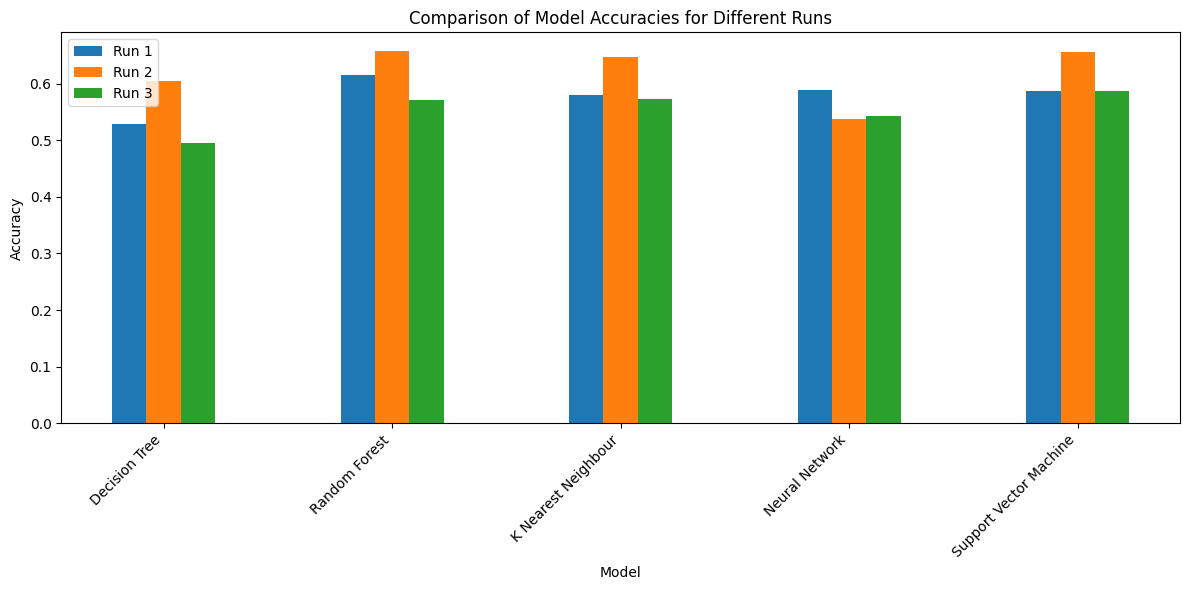

In [2354]:
# Plot the comparison
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(models))

for i, run_accuracies in enumerate(all_accuracies):
    model_names = [name for name, _ in run_accuracies]
    accuracies = [accuracy for _, accuracy in run_accuracies]
    plt.bar(index + i * bar_width, accuracies, bar_width, label=f'Run {i+1}')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies for Different Runs')
plt.xticks(index + bar_width, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('Compared models.png')
plt.show()

In [2356]:
all_accuracies

[[('Decision Tree', 0.5285947712418301),
  ('Random Forest', 0.6160130718954249),
  ('K Nearest Neighbour', 0.5800653594771242),
  ('Neural Network', 0.5882352941176471),
  ('Support Vector Machine', 0.5874183006535948)],
 [('Decision Tree', 0.6053921568627451),
  ('Random Forest', 0.6576797385620915),
  ('K Nearest Neighbour', 0.6470588235294118),
  ('Neural Network', 0.5375816993464052),
  ('Support Vector Machine', 0.6560457516339869)],
 [('Decision Tree', 0.4959150326797386),
  ('Random Forest', 0.5718954248366013),
  ('K Nearest Neighbour', 0.5735294117647058),
  ('Neural Network', 0.5433006535947712),
  ('Support Vector Machine', 0.5874183006535948)]]